### EXPLORATORY DATA ANALYSIS (EDA) FOR REFUGEE AND ASSYLUM SEEKERS IN CANADA

###### Objectives: The objective of this project is to gain insights into the global refugee and asylum seeker trends from 2012 into Canada. The The analysis will uncover patterns, distributions, and relationships within this data.

![Image](image.jpg)


In [21]:
# Importing my libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [6]:
# loading my csv file into my datafram
df = pd.read_csv('can-stats-2012-22.csv')
df

,Year,Country-of-origin,UNHCR-refugees,Asylum-seekers,total-count
0,2012,Afghanistan AF),2609,411,3020
1,2012,Albania,1764,579,2343
2,2012,Algeria,513,284,797
3,2012,Angola,753,21,774
4,2012,Antigua and Barbuda,40,30,70
...,...,...,...,...,...
1865,2022,Venezuela (Bolivarian Republic of),1497,2104,3601
1866,2022,Western Sahara,5,0,5
1867,2022,Yemen,450,452,902
1868,2022,Zambia,23,25,48


In [7]:
# check the information on dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1870 entries, 0 to 1869
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               1870 non-null   int64 
 1   Country-of-origin  1870 non-null   object
 2   UNHCR-refugees     1870 non-null   int64 
 3   Asylum-seekers     1870 non-null   int64 
 4   total-count        1870 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 73.2+ KB


In [8]:
# checking the number of rows and columns
df.shape

(1870, 5)

In [9]:
df.columns

Index(['Year', 'Country-of-origin', 'UNHCR-refugees', 'Asylum-seekers',
       'total-count'],
      dtype='object')

In [10]:
df.count()

Year                 1870
Country-of-origin    1870
UNHCR-refugees       1870
Asylum-seekers       1870
total-count          1870
dtype: int64

In [11]:
# checking the datatype of a column
df['Year'].dtype

dtype('int64')

In [12]:
df['Country-of-origin'].dtype

dtype('O')

In [13]:
df['UNHCR-refugees'].dtype

dtype('int64')

In [14]:
df['Asylum-seekers'].dtype

dtype('int64')

In [15]:
# counting null
df_null = df.isnull().sum()
df_null

Year                 0
Country-of-origin    0
UNHCR-refugees       0
Asylum-seekers       0
total-count          0
dtype: int64

In [16]:
# Checking for duplicates
duplicates = df.duplicated()
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
1865    False
1866    False
1867    False
1868    False
1869    False
Length: 1870, dtype: bool

In [17]:
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


### Statistical Analysis

In [19]:
# Descriptive Analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1870.0,2016.955615,3.167123,2012.0,2014.00,2017.0,2020.00,2022.0
UNHCR-refugees,1870.0,752.438503,2427.738942,0.0,20.00,124.0,563.75,75098.0
Asylum-seekers,1870.0,323.139572,1181.143362,0.0,7.00,36.0,195.25,19765.0
total-count,1870.0,1075.578075,2980.751399,0.0,39.25,187.0,889.75,75294.0


#### Observations
##### The dataset covers refugee and asylum seeker data in Canada from 2012 to 2022.

* 1. UNHCR Refugees:The average number of UNHCR refugees per country per year is approximately 752.The data shows significant variability, with some countries contributing a very small number of refugees and others contributing very large numbers (up to 75,098).

* 2. Asylum Seekers:The average number of asylum seekers per country per year is around 323.There is considerable variability in the number of asylum seekers, with some countries having none and others having up to 19,765.

* 3. Total Count:The combined total (UNHCR refugees and asylum seekers) per country per year averages around 1,076.This total also shows high variability, with maximum values reaching up to 75,294.

* 4. Data Consistency:The dataset has no missing values for any of the columns.

In [20]:
df.corr(numeric_only = True)

,Year,UNHCR-refugees,Asylum-seekers,total-count
Year,1.000000,-0.024037,0.144239,0.037578
UNHCR-refugees,-0.024037,1.000000,0.278267,0.924737
Asylum-seekers,0.144239,0.278267,1.000000,0.622897
total-count,0.037578,0.924737,0.622897,1.000000


#### Correlation Observation
* 1. Year has very weak correlations with all the other variables, suggesting that changes in year do not strongly predict changes in the number of UNHCR refugees, asylum seekers, or the total count.
* 2. UNHCR-refugees and total-count are very strongly correlated, indicating that the number of UNHCR refugees is a major component of the total count.
* 3. Asylum-seekers have a moderate correlation with the total-count, reflecting their contribution to the total count but to a lesser extent than UNHCR refugees.
* 4. UNHCR-refugees and asylum-seekers are weakly correlated, suggesting that countries with higher numbers of refugees do not necessarily have correspondingly high numbers of asylum seekers, and vice versa.

#### The data is clean and there are no duplicates in this data

## Data Analysis Questions

### 1. From which countries has Canada admitted the highest number of refugees (limit to top 5)

In [22]:
df.columns

Index(['Year', 'Country-of-origin', 'UNHCR-refugees', 'Asylum-seekers',
       'total-count'],
      dtype='object')

In [26]:
# Group by 'Country-of-origin' and sum the 'UNHCR-refugees' column
refugee_totals = df.groupby('Country-of-origin')['UNHCR-refugees'].sum()
refugee_totals


Country-of-origin
Afghanistan        26388
Afghanistan AF)     2609
Albania            11360
Algeria             5547
Angola              4081
                   ...  
Viet Nam             793
Western Sahara         5
Yemen               9309
Zambia               343
Zimbabwe           19126
Name: UNHCR-refugees, Length: 189, dtype: int64

In [32]:
# sort into top 10
top_countries = refugee_totals.sort_values(ascending=False).head(5)

print(top_countries)

Country-of-origin
Colombia    108416
China        98586
Ukraine      88376
Pakistan     74737
Haiti        70956
Name: UNHCR-refugees, dtype: int64


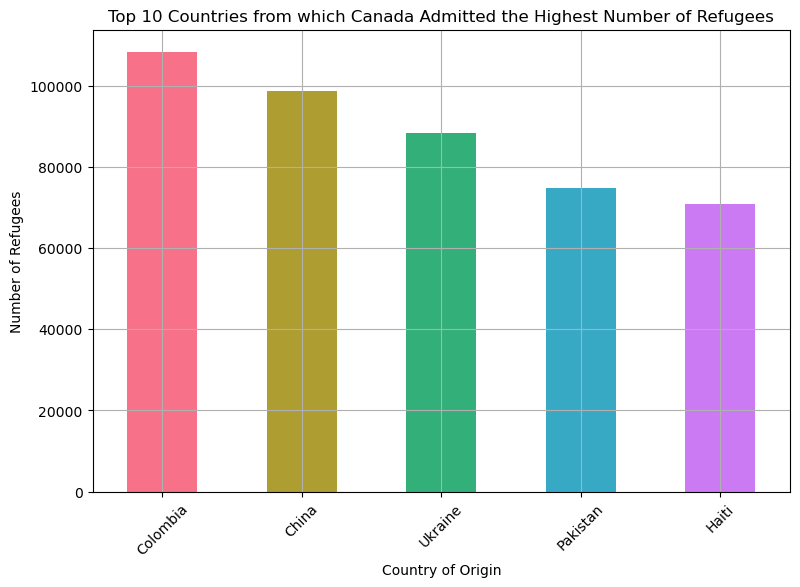

In [59]:
# to plot a bar chart using matplotlib
palette = sns.color_palette("husl", len(top_countries))
plt.figure(figsize=(9, 6))
top_countries.plot(kind='bar', color=palette)
plt.title('Top 10 Countries from which Canada Admitted the Highest Number of Refugees')
plt.xlabel('Country of Origin')
plt.ylabel('Number of Refugees')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 2. What are the total number of resettled refugees in Canada per year?

In [31]:
# Group by 'Year' and sum the 'UNHCR-refugees' column
refugees_per_year = df.groupby('Year')['UNHCR-refugees'].sum()
refugees_per_year

Year
2012    163751
2013    160347
2014    149164
2015    135890
2016     97322
2017    104768
2018    114101
2019    101757
2020    109214
2021    130125
2022    140621
Name: UNHCR-refugees, dtype: int64

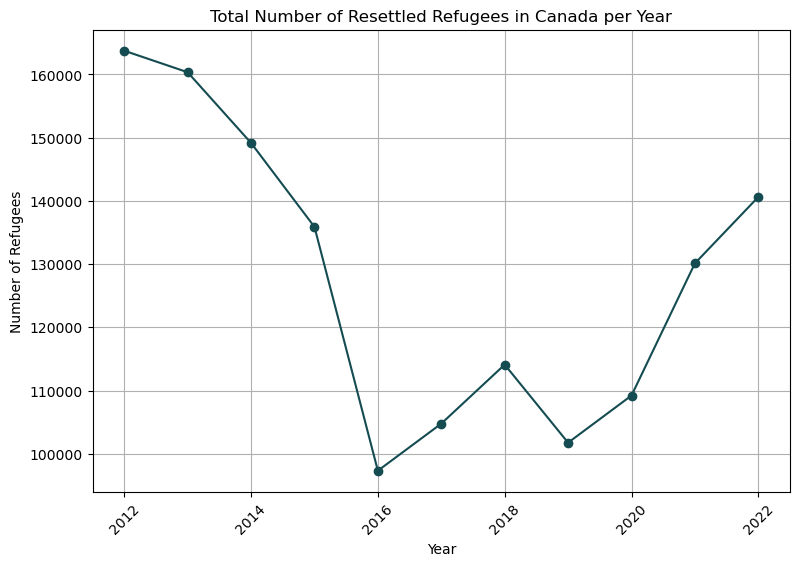

In [66]:
# Plotting the total number of resettled refugees per year
plt.figure(figsize=(9, 6))
refugees_per_year.plot(kind='line', marker='o', color='#144c52')
plt.title('Total Number of Resettled Refugees in Canada per Year')
plt.xlabel('Year')
plt.ylabel('Number of Refugees')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### 3. What are the countries of origin for the majority of asylum claims made in Canada? (limit to top 7)

In [53]:
# Group by 'Country-of-origin' and sum the 'Asylum-seekers' column
asylum_claims_totals = df.groupby('Country-of-origin')['Asylum-seekers'].sum()
asylum_claims_totals


Country-of-origin
Afghanistan        5440
Afghanistan AF)     411
Albania            2875
Algeria            4400
Angola             5557
                   ... 
Viet Nam            754
Western Sahara        0
Yemen              2885
Zambia              147
Zimbabwe           2093
Name: Asylum-seekers, Length: 189, dtype: int64

In [54]:
# Sort the totals in descending order and get the top 7 countries
top_asylum_countries = asylum_claims_totals.sort_values(ascending=False).head(7)
print(top_asylum_countries)


Country-of-origin
Unknown     56098
Nigeria     51620
India       48806
Mexico      45774
Haiti       40908
Colombia    30475
China       21526
Name: Asylum-seekers, dtype: int64


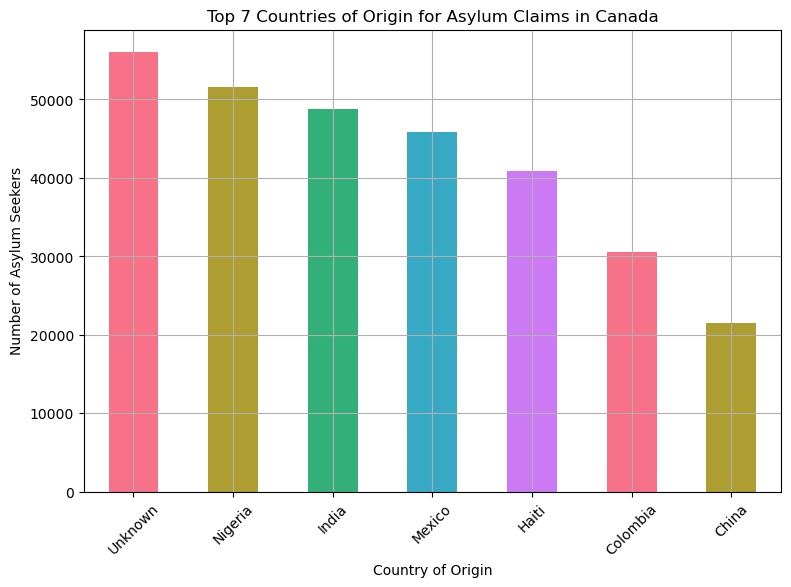

In [57]:
# Plotting the bar chart for the top 7 countries of origin for asylum claims
plt.figure(figsize=(9, 6))
top_asylum_countries.plot(kind='bar', color=palette)
plt.title('Top 7 Countries of Origin for Asylum Claims in Canada')
plt.xlabel('Country of Origin')
plt.ylabel('Number of Asylum Seekers')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### 4. What is the total number of asylum claims made in Canada every year?

In [60]:
# Group by Year and sum the 'Asylum-seekers column
asylum_claims_per_year = df.groupby('Year')['Asylum-seekers'].sum()
print(asylum_claims_per_year)


Year
2012     32647
2013     22145
2014     16699
2015     19631
2016     23946
2017     51859
2018     78766
2019     97017
2020     85352
2021     63143
2022    113066
Name: Asylum-seekers, dtype: int64


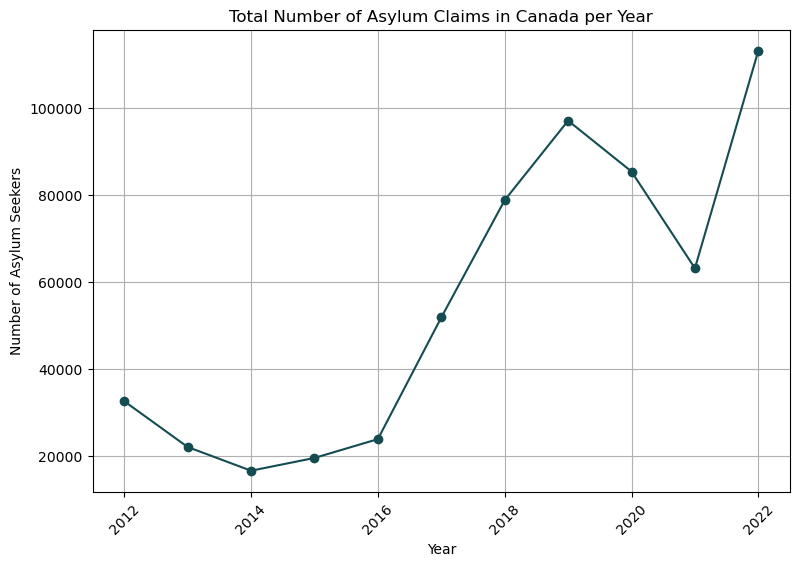

In [67]:
import matplotlib.pyplot as plt

# Plotting the total number of asylum claims per year
plt.figure(figsize=(9, 6))
asylum_claims_per_year.plot(kind='line', marker='o', color='#144c52')
plt.title('Total Number of Asylum Claims in Canada per Year')
plt.xlabel('Year')
plt.ylabel('Number of Asylum Seekers')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### 5. What are the general trends in refugee and asylum statistics from 2012-2022? (Hint: Unpivoting the refugee and asylum column so it becomes rows with each of their values beside as another column, you might need to use pd.melt)

In [68]:
# Unpivot the refugee and asylum data
df_melted = pd.melt(df, id_vars=['Year'], value_vars=['UNHCR-refugees', 'Asylum-seekers'], 
                    var_name='Type', value_name='Count')
print(df_melted.head())


   Year            Type  Count
0  2012  UNHCR-refugees   2609
1  2012  UNHCR-refugees   1764
2  2012  UNHCR-refugees    513
3  2012  UNHCR-refugees    753
4  2012  UNHCR-refugees     40


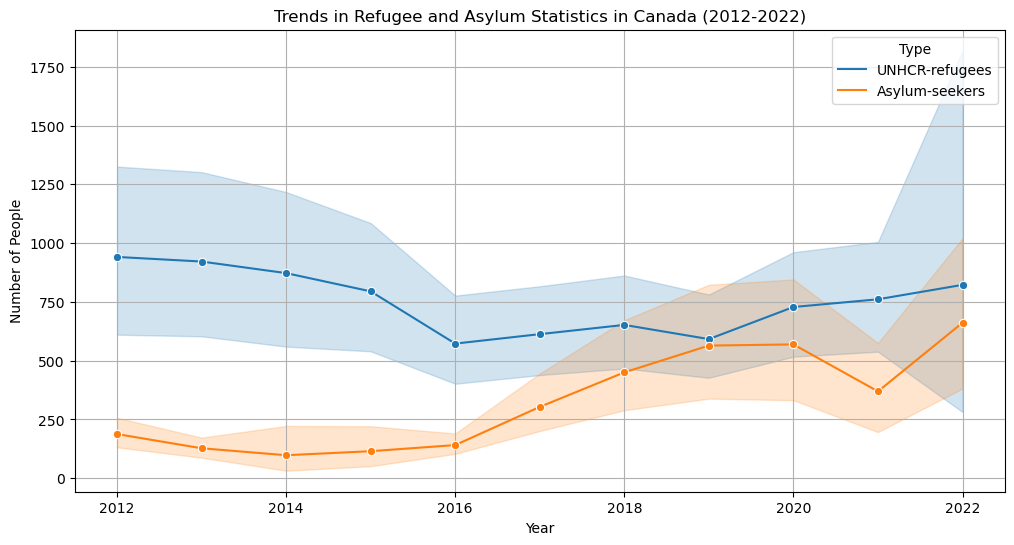

In [69]:
# Plotting the trends for both UNHCR-refugees and Asylum-seekers over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='Year', y='Count', hue='Type', marker='o')
plt.title('Trends in Refugee and Asylum Statistics in Canada (2012-2022)')
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.grid(True)
plt.show()


## INSIGHTS

* 1. Increasing Trends: Both the number of UNHCR refugees and asylum seekers in Canada have steadily increased from 2012 to 2022.
* 2. Higher Refugee Numbers: The number of UNHCR refugees has consistently been higher than the number of asylum seekers each year.
* 3. Parallel Growth: The similar growth patterns suggest that factors affecting one group also impact the other.